
### CAN'T SEE THE FOREST, FOR ALL THE TREES

**Laboration**

Syftet med den här laborationen är framförallt att lära oss hur vi på ett korrekt sätt kan tune:a hyperparameters samt träna och jämföra prestanda mellan många olika modeller - för ett verklighetstroget problem.

Vi kommer framförallt jobba med trädbaserade modeller - Decision Tree och Random Forest.

Datasetet som vi kommer jobba med och information om denne hittar ni [här](https://archive.ics.uci.edu/dataset/320/student+performance). Ni ska jobba med filen som heter 'student-por.csv'.

**Instruktioner**

Utför varje uppgift så att jag kan köra er notebook rakt-av, uppifrån och ner! Varje uppgift ska lösas på angiven plats.

**Inlämning**

Skicka in hela din notebook på ITHS-portalen, efter att du döpt om den till *laboration_forest_förnamn_efternamn.ipynb*.

**Uppgift 0**

In [1]:
# importera samtliga nödvändiga paket här.
# efterhand kanske du inser att du behöver importera fler paket, lägg då över importerna hit istället

import matplotlib.pyplot as plt


from sklearn import tree

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import pandas as pd

from sklearn.model_selection import train_test_split  
from sklearn.metrics import make_scorer, mean_absolute_error

from sklearn.preprocessing import MinMaxScaler

import numpy as np


**Uppgift 1**

Läs på om datasetet. Ladda därefter ner den och läs in den till en pandas dataframe. 

Obs: du bör troligtvis behöva *delimiter=';'* som argument till pd.read_csv funktionen.

In [2]:
import pandas as pd

Student_df = pd.read_csv("student-por.csv", delimiter=';')

pd.set_option('display.max_columns', None)


In [3]:
Student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


**Uppgift 2**

Utför en ordentlig EDA (Exploratory Data Analysis). Rita upp relevanta plottar och kommentera på det du känner är befogat.

In [4]:
Student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

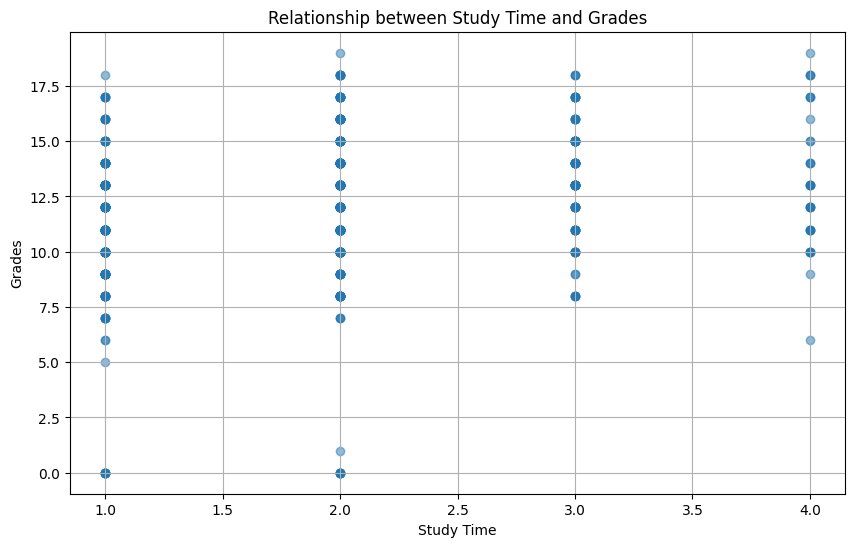

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(Student_df['studytime'], Student_df['G3'], alpha=0.5)
plt.title('Relationship between Study Time and Grades')
plt.xlabel('Study Time')
plt.ylabel('Grades')
plt.grid(True)
plt.show()

In [6]:

filtered_students = Student_df[Student_df['studytime'] >= 4]

average_grade = filtered_students['G3'].mean()

print("Average grade for students with 4+ hours of study time:", average_grade)

Average grade for students with 4+ hours of study time: 13.057142857142857


In [7]:

filtered_students = Student_df[Student_df['studytime'] <= 3]

average_grade = filtered_students['G3'].mean()

print("Average grade for students with <3 hours of study time:", average_grade)

Average grade for students with <3 hours of study time: 11.840390879478827


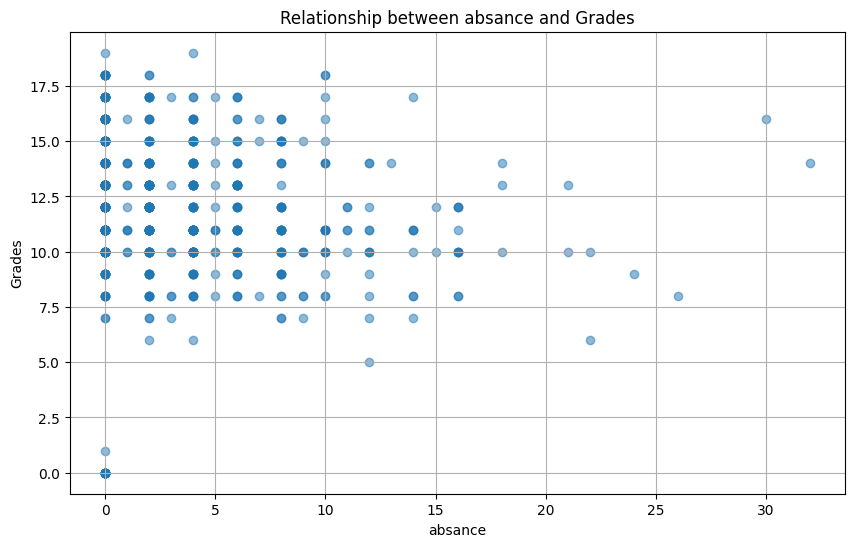

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(Student_df['absences'], Student_df['G3'], alpha=0.5)
plt.title('Relationship between absance and Grades')
plt.xlabel('absance')
plt.ylabel('Grades')
plt.grid(True)
plt.show()

In [9]:
filtered_students = Student_df[Student_df['absences'] <= 3]

average_grade = filtered_students['G3'].mean()

print("Average grade for students with <3 hours of absance:", average_grade)

Average grade for students with <3 hours of absance: 12.067024128686327


In [10]:
filtered_students = Student_df[Student_df['absences'] >= 5]

average_grade = filtered_students['G3'].mean()

print("Average grade for students with 5+ hours of absance:", average_grade)

Average grade for students with 5+ hours of absance: 11.524590163934427


In [11]:
print(Student_df['Mjob'].value_counts())
print(Student_df['Fjob'].value_counts())

Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64
Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: count, dtype: int64


In [12]:
#i decided to delete alot of these after playing with the data and not really seeing an improvement, i started with only .drop the columns from mjob to G2.

Student_df.drop(columns=['guardian','reason','G1','G2','paid','famsup','Mjob','Fjob','famsize'], inplace=True)

**Uppgift 3**

Gör en första hypotes på vilka features du tror är relevanta. 

Tvätta sedan datan och utför även den feature engineering du anser är lämplig. 

Kom ihåg att du även behöver hantera kategoriska kolumner. 

Motivera samtliga beslut och åtgärder med kommentarer.

In [13]:
# lös uppgift 3 här
# jag tror dom jag har haft kvar är väldigt relevanta och inte är dåliga pågrund av att dom inte har interdependence med de andra features som finns kvar
# allmänt sagt är nästan alla som fanns inom datan även innan jag tog bort många, väldigt relevanta.


Student_df


,school,sex,age,address,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,A,4,4,2,2,0,yes,no,yes,yes,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,T,1,1,1,2,0,no,no,no,yes,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,T,1,1,1,2,0,yes,no,yes,yes,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,T,4,2,1,3,0,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,T,3,3,1,2,0,no,no,yes,yes,no,no,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,T,2,3,1,3,1,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10
645,MS,F,18,U,T,3,1,1,2,0,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,16
646,MS,F,18,U,T,1,1,2,2,0,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,9
647,MS,M,17,U,T,3,1,2,1,0,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10


In [14]:
Student_df['school'] = [1 if school == 'GP' else 0 for school in Student_df['school']]

Student_df['sex'] = [1 if sex == 'M' else 0 for sex in Student_df['sex']]

Student_df['romantic'] = [1 if romantic == 'yes' else 0 for romantic in Student_df['romantic']]

Student_df['nursery'] = [1 if nursery == 'yes' else 0 for nursery in Student_df['nursery']]

Student_df['Pstatus'] = [1 if Pstatus == 'A' else 0 for Pstatus in Student_df['Pstatus']]

Student_df['higher'] = [1 if higher == 'yes' else 0 for higher in Student_df['higher']]

Student_df['schoolsup'] = [1 if schoolsup == 'yes' else 0 for schoolsup in Student_df['schoolsup']]

Student_df['internet'] = [1 if internet == 'yes' else 0 for internet in Student_df['internet']]


Student_df['address'] = [1 if address == 'U' else 0 for address in Student_df['address']]

Student_df['activities'] = [1 if activities == 'yes' else 0 for activities in Student_df['activities']]







In [15]:
# i was also considering getting dummies for the column "age" tho i realisted there are alot more ages than i thought all the way from 15 to 22, there for i decided keeping it the way it is might be the best choice.
Student_df

,school,sex,age,address,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,1,0,18,1,1,4,4,2,2,0,1,0,1,1,0,0,4,3,4,1,1,3,4,11
1,1,0,17,1,0,1,1,1,2,0,0,0,0,1,1,0,5,3,3,1,1,3,2,11
2,1,0,15,1,0,1,1,1,2,0,1,0,1,1,1,0,4,3,2,2,3,3,6,12
3,1,0,15,1,0,4,2,1,3,0,0,1,1,1,1,1,3,2,2,1,1,5,0,14
4,1,0,16,1,0,3,3,1,2,0,0,0,1,1,0,0,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,0,19,0,0,2,3,1,3,1,0,1,0,1,1,0,5,4,2,1,2,5,4,10
645,0,0,18,1,0,3,1,1,2,0,0,0,1,1,1,0,4,3,4,1,1,1,4,16
646,0,0,18,1,0,1,1,2,2,0,0,1,1,1,0,0,1,1,1,1,1,5,6,9
647,0,1,17,1,0,3,1,2,1,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10


**Uppgift 4**

Särkilj nu på features och target. Vår target är kolumnen G3.

Lägg alla features i variabeln X och din target i variabel y.

Obs! Du får inte använda kolumnerna G1 eller G2 som features, det är nästintill fuskig (varför?). Säkerställ att de **inte** är med i dina features.

Spara även namnen på kolumnerna du använder som features i en variabel som du kallar feature_column_names

In [16]:
# lös uppgift 4 här

# anledningen vi inte kan använda g1 och g2 är för att det är dom som baseras när man skapar final grade, som är = G3, dessutom även om det inte är 100% correlerat till g3
# är det fortfarande dumt att använda för det förstör anledningen man skapar ett sådant modell som vi gör nu och ger bara en falskt bra prediction.

X, y = Student_df.drop(columns=['G3']), Student_df['G3']

Features_column_names = X.columns


In [17]:
Features_column_names

Index(['school', 'sex', 'age', 'address', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')

**Uppgift 5**

Utför en helt vanlig train/test split. Sätt test size till 20%. Träna sedan en RandomForestRegressor på din träningsdata.

Använd random_state = 42 i både train/test split samt som argument till din modell.

Kör nu koden nedan för att hur relativt viktig varje kolumn var för vår träning! Ett högre värde = viktigare kolumn.

Hur tolkar du det du ser? Does it make sense?

In [18]:
# lös uppgift 5 här
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)



model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 2.092846153846154


In [19]:
# just making sure it is correct for the plot.
print(Features_column_names.shape)
print(model.feature_importances_.shape)

(23,)
(23,)


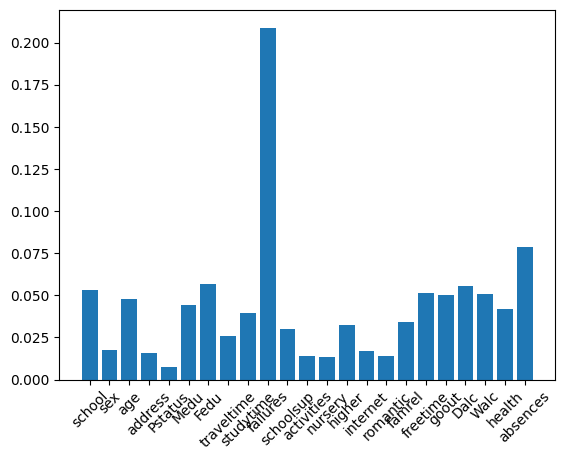

In [20]:
plt.bar(Features_column_names, model.feature_importances_)
plt.xticks(rotation=45)
plt.show()

### for me it makes 100% sense, even when i used to focus alot in highschool to get high grades i went into grading information that existed in skolverkets website and it always included these specific higher valued columns when it did its statistics which is probobly cause they were the ones that influenced the students grades the most.

**Uppgift 6**

Bra. Nu drar vi igång på riktigt.

Kör nu koden nedan för att utföra en GridSearch (med cross-validation) över alla kombinationer av de angivna hyperparameters.

Observera att vi använder hela datasetet X och y här, inte dina splits ovan. GridSearchCV skapar automatiskt splits åt oss.

Dokumentationen för GridSearchCV hittar du [här](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [21]:
# Skapa en parametergrid att söka bland

param_grid = {
    'max_depth': [2, 4, 6],
    'n_estimators': [2, 4, 6, 8, 10]
}

# Initiera en basmodell
rf = RandomForestRegressor()

# Defiiniera metric att räkna performance
score = make_scorer(mean_absolute_error)

# Definiera GridSearch-objektet
grid_search = GridSearchCV(estimator = rf,                # ange basmodell
                           param_grid = param_grid, 
                           cv = 3,                        # 3-fold cross-validation
                           n_jobs = -1,                   # använd alla möjliga processer för snabbare träning
                           verbose = 2,                   # läs i dokumentationen vad detta innebär
                           scoring=score) 

# Utför grid search över alla möjliga kombinationer av dina hyperparameters
grid_search.fit(X, y)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6],
                         'n_estimators': [2, 4, 6, 8, 10]},
             scoring=make_scorer(mean_absolute_error), verbose=2)

**Uppgift 7**

Kör koden nedan för att utforska vilken information som nu sparats från din GridSearch

In [22]:
cv_results = grid_search.cv_results_

cv_results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [23]:
# after playing with the dataset i have decided to remove and adjust the features used to get a better average and specifically consistency 
# meaning that the Standard deviation is as low as i could get it.

print(np.mean(cv_results['std_test_score']))

print(np.mean(cv_results['mean_test_score']))

print("Worst parameters:", grid_search.best_params_)


0.3334570763150294
2.2792358661602607
Worst parameters: {'max_depth': 6, 'n_estimators': 2}


In [24]:
cv_results['rank_test_score']

# the ranking is based on the ones with the highest score in total so when the ranking says 1, it is actually the worst combination.
# when it says 15 it is the best, due to it having the lowest MAE score.

array([ 2,  8, 15,  6, 12,  5,  3,  9, 13, 11,  1,  4, 10, 14,  7])

**Uppgift 8**

Vilken kombination av hyperparameters gav upphov till bäst/sämst performance?

Vilken är den bästa/sämsta scoren?

In [25]:
# lös uppgift 8 här

# depth of 4 with n_estimators 10, gives the best score averagly and it gets more pronounced when using more folds or doing the grid several times over. 
# whilst the depth of 6 and with a number of estimators as 2 being consistently the worst score.


# to adjust for when this is run by you reading this (ali) i will make a code which shows u which combination gave the best score for the specific runtime you had.

worst_index = np.argmax(grid_search.cv_results_['mean_test_score'])

best_index = np.argmin(grid_search.cv_results_['mean_test_score'])


worst_params = grid_search.cv_results_['params'][worst_index]

best_params = grid_search.cv_results_['params'][best_index]

print(f'Hyperparameters resulting in the worst mean test score:, {worst_params}')


print(f'Hyperparameters resulting in the best score is: {best_params}')            



Hyperparameters resulting in the worst mean test score:, {'max_depth': 6, 'n_estimators': 2}
Hyperparameters resulting in the best score is: {'max_depth': 2, 'n_estimators': 6}


**Uppgift 9**

Är den bästa scoren "bra" i vårt sammanhang? Varför? Motivera.

In [26]:
# lös uppgift 9 här
index_with_best_average = np.argmax(cv_results['rank_test_score'])


score_best_index_split0 = (cv_results['split0_test_score'][index_with_best_average])
score_best_index_split1 = (cv_results['split1_test_score'][index_with_best_average])
score_best_index_split2 = (cv_results['split2_test_score'][index_with_best_average])

Total_Best_Score = score_best_index_split0 + score_best_index_split1 + score_best_index_split2

print(f'The best combination gave this MAE {Total_Best_Score / 3}')



The best combination gave this MAE 2.211628800809517


In [27]:
# den bästa scoren är endå rätt så bra inom vårat sammanhang men generellt är den egentligen inte ens bra bara okej, genom att ta medelmåttet av betygen och bara gissa medelmåttet får man inte
# så mycket högre MAE, för någon anledning gör testet super bra på första folden där tycker jag den är väldigt bra men annars är den bara helt ok.

# vid slutet efter jag började förstå vilka features som är bäst och hur man ska dessutom använda Max_features parametern på rätt sätt började jag få mycket bättre MAE
# I alla fall relativt till det jag får normalt.

**Uppgift 10**

Testa nu att träna med dina egenvalda hyperparameters! 

Du kan lägga till fler värden för max_depth och n_estimators, men du kan också välja fler hyperparameters att tune:a.

Random Forest har många fler hyperparameters, kolla in den officiella dokumentationen [här](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

Lägg till minst 4 fler hyperparameters, utöver max_depth och n_estimators, och välj vilka värden på dessa du vill testa. 

Kör igenom en till GridSearch över dessa. Får du bättre resultat än innan?

**Tips**: För din egen skull, försök även första vad de olika hyperparameters du väljer faktiskt kontrollerar.

In [28]:
param_grid = {
    'max_depth': [None, 20, 30], 
    'n_estimators': [50,75,100],
    'max_samples': [0.75, 1.0],    
    'min_samples_split': [12, 18],
    'min_samples_leaf': [2, 4, 6],
    'max_leaf_nodes': [10,15,30]

}

rf = RandomForestRegressor()

score = make_scorer(mean_absolute_error)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring=score)

grid_search.fit(X, y)



Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 20, 30],
                         'max_leaf_nodes': [10, 15, 30],
                         'max_samples': [0.75, 1.0],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [12, 18],
                         'n_estimators': [50, 75, 100]},
             scoring=make_scorer(mean_absolute_error), verbose=2)

In [29]:
cv_results = grid_search.cv_results_

cv_results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_leaf_nodes', 'param_max_samples', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [30]:
print(np.mean(cv_results['std_test_score']))

print(np.mean(cv_results['mean_test_score']))

worst_index = np.argmax(grid_search.cv_results_['mean_test_score'])

best_index = np.argmin(grid_search.cv_results_['mean_test_score'])


worst_params = grid_search.cv_results_['params'][worst_index]

best_params = grid_search.cv_results_['params'][best_index]

print(f'Hyperparameters resulting in the worst mean test score:, {worst_params}')

print(f'Hyperparameters resulting in the best score is: {best_params}')

0.2929619427352966
2.163899572236422
Hyperparameters resulting in the worst mean test score:, {'max_depth': 30, 'max_leaf_nodes': 10, 'max_samples': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 12, 'n_estimators': 50}
Hyperparameters resulting in the best score is: {'max_depth': 30, 'max_leaf_nodes': 30, 'max_samples': 0.75, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 75}


In [31]:
index_with_best_average = np.argmax(cv_results['rank_test_score'])


score_best_index_split0 = (cv_results['split0_test_score'][index_with_best_average])
score_best_index_split1 = (cv_results['split1_test_score'][index_with_best_average])
score_best_index_split2 = (cv_results['split2_test_score'][index_with_best_average])

Total_Best_Score = score_best_index_split0 + score_best_index_split1 + score_best_index_split2

print(f'The best combination gave this MAE {Total_Best_Score / 3}')

The best combination gave this MAE 2.1170405182805014


In [32]:
# ja jag får bättre resultat men inte för att jag vet hur man använder dessa andra hyperparameter på bästa sätt, jag förstår dom rätt så bra endå för jag har lagt tid och läst.
# men vet inte hur man använder dom på ett djupgåendligt och praktiskt sätt, får bara bättre resultat för att jag har fler estimators och depth.

**Uppgift 11**

Kör nu även en GridSearch på en enstaka Decision Tree (inte Random Forest) där du testar olika värden på max_depth.

Hur förhåller sig resultatet här mot det vi fick med Random Forest?

Kolla gärna dokumentationen för Decision Tree [här](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), och se om du kan leka med fler hyperparameters än enbart max_depth.

In [33]:
dt = tree.DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [12, 18],
    'min_samples_leaf': [2, 4, 6]
}

score = make_scorer(mean_absolute_error)

grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring=score)

grid_search.fit(X, y)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\diana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [12, 18]},
             scoring=make_scorer(mean_absolute_error), verbose=2)

In [34]:
cv_results = grid_search.cv_results_


best_index = np.argmin(grid_search.cv_results_['mean_test_score'])


grid_search.cv_results_['params'][best_index]

{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 12}

In [35]:
grid_search.cv_results_['mean_test_score']

array([2.68470871, 2.74494368, 2.63081015, 2.68797292, 2.60153894,
       2.66636798, 2.86204984, 2.79572026, 2.7402216 , 2.83906526,
       2.83590061, 2.78043039, 2.85125448, 2.80036411, 2.75721824,
       2.84061558, 2.81432412, 2.75576748])

In [36]:
dt = tree.DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 30, 60],
}

score = make_scorer(mean_absolute_error)

grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring=score)

grid_search.fit(X, y)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\diana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 30, 60]},
             scoring=make_scorer(mean_absolute_error), verbose=2)

In [37]:
cv_results = grid_search.cv_results_


In [38]:
best_index = np.argmin(grid_search.cv_results_['mean_test_score'])


grid_search.cv_results_['params'][best_index]

{'max_depth': 5}

In [39]:
grid_search.cv_results_['mean_test_score']

array([2.82044006, 3.15350316, 3.19207629, 3.27239432, 3.16752717])

In [40]:
#generellt sätt är den bara mycket sämmre på nästan alla sätt. 

**Uppgift 12**


Vi har nu haft ett fixerat dataset och testa massa olika hyperparameters på framförallt Random Forest. 

Men, nu ska vi även börja fiffla med att testa olika features också! 

Kom ihåg - för varje kombination av features får vi GridSearcha om och hitta de hyperparameters som presterar bäst.

Testa nu annorlunda input features och kör en GridSearch över hyperparametrar för Random Forest, och försök hitta den kombination av hyperparameters för Random Forest som presterar bäst på dessa. 

In [41]:
Student_df

,school,sex,age,address,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,1,0,18,1,1,4,4,2,2,0,1,0,1,1,0,0,4,3,4,1,1,3,4,11
1,1,0,17,1,0,1,1,1,2,0,0,0,0,1,1,0,5,3,3,1,1,3,2,11
2,1,0,15,1,0,1,1,1,2,0,1,0,1,1,1,0,4,3,2,2,3,3,6,12
3,1,0,15,1,0,4,2,1,3,0,0,1,1,1,1,1,3,2,2,1,1,5,0,14
4,1,0,16,1,0,3,3,1,2,0,0,0,1,1,0,0,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,0,19,0,0,2,3,1,3,1,0,1,0,1,1,0,5,4,2,1,2,5,4,10
645,0,0,18,1,0,3,1,1,2,0,0,0,1,1,1,0,4,3,4,1,1,1,4,16
646,0,0,18,1,0,1,1,2,2,0,0,1,1,1,0,0,1,1,1,1,1,5,6,9
647,0,1,17,1,0,3,1,2,1,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10


In [42]:
X, y = Student_df.drop(columns=['G3','address','Pstatus','traveltime','failures','schoolsup','activities','famrel','Walc','goout','romantic','nursery','goout']), Student_df['G3']


In [43]:
param_grid = {
    'max_depth': [None, 20, 30], 
    'n_estimators': [50,75,100],
}

rf = RandomForestRegressor()

score = make_scorer(mean_absolute_error)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring=score)

grid_search.fit(X, y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 20, 30],
                         'n_estimators': [50, 75, 100]},
             scoring=make_scorer(mean_absolute_error), verbose=2)

In [44]:
cv_results = grid_search.cv_results_


In [45]:
cv_results['mean_test_score']

array([2.45846986, 2.40580557, 2.40549724, 2.4284131 , 2.4064287 ,
       2.39829079, 2.37837162, 2.37170104, 2.43549927])

In [46]:
index_with_best_average = np.argmax(cv_results['rank_test_score'])


score_best_index_split0 = (cv_results['split0_test_score'][index_with_best_average])
score_best_index_split1 = (cv_results['split1_test_score'][index_with_best_average])
score_best_index_split2 = (cv_results['split2_test_score'][index_with_best_average])

Total_Best_Score = score_best_index_split0 + score_best_index_split1 + score_best_index_split2

print(f'The best combination gave this MAE {Total_Best_Score / 3}')

The best combination gave this MAE 2.3717010392368816


In [47]:
best_index = np.argmin(grid_search.cv_results_['mean_test_score'])


grid_search.cv_results_['params'][best_index]

{'max_depth': 30, 'n_estimators': 75}

In [48]:
X, y = Student_df.drop(columns=['G3','address','Pstatus','traveltime','schoolsup','activities','famrel','Walc','goout','romantic','nursery','goout','Dalc','freetime','internet','higher','schoolsup','age']), Student_df['G3']


In [49]:
param_grid = {
    'max_depth': [None, 20, 30], 
    'n_estimators': [50,75,100],
}

rf = RandomForestRegressor()

score = make_scorer(mean_absolute_error)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring=score)

grid_search.fit(X, y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 20, 30],
                         'n_estimators': [50, 75, 100]},
             scoring=make_scorer(mean_absolute_error), verbose=2)

In [50]:
print(np.mean(cv_results['std_test_score']))

print(np.mean(cv_results['mean_test_score']))

0.3630010980020506
2.4098307978530142


In [51]:
index_with_best_average = np.argmax(cv_results['rank_test_score'])


score_best_index_split0 = (cv_results['split0_test_score'][index_with_best_average])
score_best_index_split1 = (cv_results['split1_test_score'][index_with_best_average])
score_best_index_split2 = (cv_results['split2_test_score'][index_with_best_average])

Total_Best_Score = score_best_index_split0 + score_best_index_split1 + score_best_index_split2

print(f'The best combination gave this MAE {Total_Best_Score / 3}')

The best combination gave this MAE 2.3717010392368816


In [52]:
best_index = np.argmin(grid_search.cv_results_['mean_test_score'])


grid_search.cv_results_['params'][best_index]

{'max_depth': 30, 'n_estimators': 100}

In [53]:
X

,school,sex,Medu,Fedu,studytime,failures,health,absences
0,1,0,4,4,2,0,3,4
1,1,0,1,1,2,0,3,2
2,1,0,1,1,2,0,3,6
3,1,0,4,2,3,0,5,0
4,1,0,3,3,2,0,5,0
...,...,...,...,...,...,...,...,...
644,0,0,2,3,3,1,5,4
645,0,0,3,1,2,0,1,4
646,0,0,1,1,2,0,5,6
647,0,1,3,1,1,0,2,6


In [54]:
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)



model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 2.1957791208791213


**Uppgift 13**

Kan du hitta en minsta mängd features som räcker för att få hög prestanda? Dvs, hur många & vilka features kan du drop:a utan någon vidare prestandaförlust?

In [55]:
# lös uppgift 13 här
X, y = Student_df.drop(columns=['G3','address','Pstatus','traveltime','schoolsup','activities','famrel','Walc','goout','romantic','nursery','goout','Dalc','freetime','internet','higher','schoolsup','age']), Student_df['G3']

# Den jag precis använt verkar vara den minsta mängden man kan ha, redan där börjar den få mycket sämre MAE, men jag skulle säga det är det här som är minst med bäst resultat.

In [56]:
# prövar också med att, kolla vilken mängd max features på random forest för varje decisiontree som ger bäst resultat.
X, y = Student_df.drop(columns=['G3']), Student_df['G3']


In [69]:
param_grid = {
    'max_depth': [None, 20, 30], 
    'n_estimators': [50,75,100],
     'max_features': [2, 4, 6]
}

rf = RandomForestRegressor()

score = make_scorer(mean_absolute_error)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring=score)

grid_search.fit(X, y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 20, 30], 'max_features': [2, 4, 6],
                         'n_estimators': [50, 75, 100]},
             scoring=make_scorer(mean_absolute_error), verbose=2)

In [70]:
cv_results = grid_search.cv_results_


In [71]:
index_with_best_average = np.argmax(cv_results['rank_test_score'])


score_best_index_split0 = (cv_results['split0_test_score'][index_with_best_average])
score_best_index_split1 = (cv_results['split1_test_score'][index_with_best_average])
score_best_index_split2 = (cv_results['split2_test_score'][index_with_best_average])

Total_Best_Score = score_best_index_split0 + score_best_index_split1 + score_best_index_split2

print(f'The best combination gave this MAE {Total_Best_Score / 3}')

The best combination gave this MAE 2.054033609262104


In [72]:
print(np.mean(cv_results['std_test_score']))

print(np.mean(cv_results['mean_test_score']))

0.372382842713321
2.0901762513806723


In [75]:
cv_results['rank_test_score']

array([ 1, 21, 17, 15, 23, 26, 24, 20,  6,  3,  7, 14, 22, 16, 11,  2,  8,
        4, 19, 25, 13,  9, 18, 27, 10, 12,  5])

In [80]:
best_index = np.argmin(grid_search.cv_results_['mean_test_score'])


grid_search.cv_results_['params'][best_index]

{'max_depth': 30, 'max_features': 4, 'n_estimators': 100}

In [92]:
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

model = RandomForestRegressor(max_depth=30, max_features=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1.9296923076923078


In [ ]:
# max 3 features for each tree seems to be the sweet spot. 
# when deciding the amount of max features the random forest calculation, it seems to improve alot, 